# Finite Element Analysis [ME335A]

### Install Dependencies

In [ ]:
!pip install numpy
!pip install scipy
!pip install matplotlib

/bin/bash: line 1: conda: command not found


### Problem 1

In [ ]:
import math
import numpy as np
import sympy as sp
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

# plt.rcParams.update({
#     'font.size': 18,          # Base font size for text
#     'axes.titlesize': 20,     # Font size for axes titles
#     'axes.labelsize': 20,     # Font size for x and y labels
#     'xtick.labelsize': 16,    # Font size for x tick labels
#     'ytick.labelsize': 16,    # Font size for y tick labels
#     'legend.fontsize': 16,    # Font size for legend
#     'figure.titlesize': 22    # Font size for figure title
# })

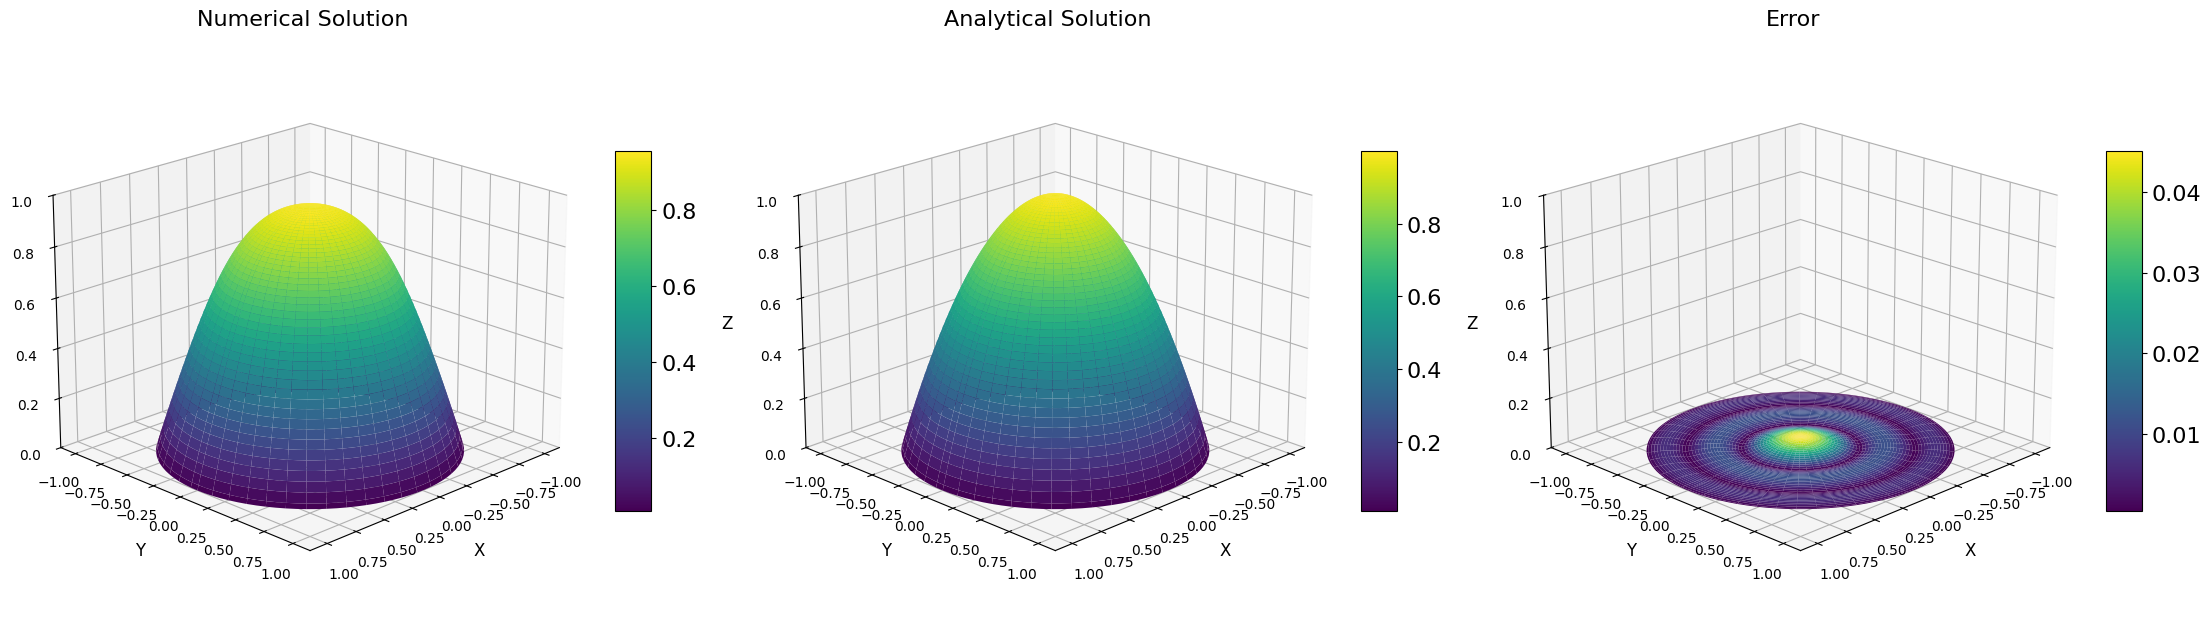

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with 1x3 subplots
fig = plt.figure(figsize=(24, 8))

# Generate data points
r = np.linspace(0, 1, 100)
theta = np.linspace(0, 2*np.pi, 100)
r, theta = np.meshgrid(r, theta)

# Calculate x and y coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Define functions
def numerical_approx(r):
    return -0.1720 * np.sin(np.pi * r**2) + 0.9548 * np.cos(np.pi/2 * r**2)

def exact(r):
    return 1 - r**2

# Calculate z values for each function
z_numerical = numerical_approx(r)
z_exact = exact(r)
z_error = np.abs(z_numerical - z_exact)

# Function to set up common properties for each subplot
def setup_subplot(ax, title):
    ax.set_title(title, fontsize=16, pad=20)
    ax.set_xlabel('X', fontsize=12, labelpad=10)
    ax.set_ylabel('Y', fontsize=12, labelpad=10)
    ax.set_zlabel('Z', fontsize=12, labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=10, pad=5)
    ax.view_init(elev=20, azim=45)  # Adjust viewing angle

# Plot numerical approximation
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(x, y, z_numerical, cmap='viridis')
ax1.set_zlim(0, 1)
setup_subplot(ax1, 'Numerical Solution')
fig.colorbar(surf1, ax=ax1, shrink=0.6, aspect=10)

# Plot exact function
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(x, y, z_exact, cmap='viridis')
ax2.set_zlim(0, 1)
setup_subplot(ax2, 'Analytical Solution')
fig.colorbar(surf2, ax=ax2, shrink=0.6, aspect=10)

# Plot error
ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(x, y, z_error, cmap='viridis')
ax3.set_zlim(0, 1)
setup_subplot(ax3, 'Error')
fig.colorbar(surf3, ax=ax3, shrink=0.6, aspect=10)

# Adjust layout and display the plot
plt.tight_layout(pad=4.0, w_pad=2.0, h_pad=2.0)
plt.show()

### Problem 2

In [ ]:
import math
import numpy as np
import sympy as sp
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate
from sympy import symbols, Function, diff, expand, integrate as sympy_integrate

plt.rcParams.update({
    'font.size': 18,          # Base font size for text
    'axes.titlesize': 20,     # Font size for axes titles
    'axes.labelsize': 20,     # Font size for x and y labels
    'xtick.labelsize': 16,    # Font size for x tick labels
    'ytick.labelsize': 16,    # Font size for y tick labels
    'legend.fontsize': 16,    # Font size for legend
    'figure.titlesize': 22    # Font size for figure title
})

In [ ]:
# Local to global map
LG = np.array([[1, 3, 4, 3], [2, 2, 6, 6], [3, 4, 3, 5]])

print(LG)

[[1 3 4 3]
 [2 2 6 6]
 [3 4 3 5]]


In [ ]:
# Define functions
x1, x2 = symbols('x1 x2')

region_condition_1 = sp.And(-1 <= x1, x1 <= 0, x2 >= 2*x1 + 1, x2 <= 1)
N31 = sp.Piecewise((1 + x1, region_condition_1), (0, True))
N21 = sp.Piecewise(((1 - x2) / 2, region_condition_1), (0, True))
N11 = sp.Piecewise((1 - N31 - N21, region_condition_1), (0, True))

region_condition_2 = sp.And(-1 <= x1, x1 <= 0, x2 <= 2*x1 + 1, x2 >= -1)
N12 = sp.Piecewise(((1 + x2) / 2, region_condition_2), (0, True))
N22 = sp.Piecewise((-x1, region_condition_2), (0, True))
N32 = sp.Piecewise((1 - N12 - N22, region_condition_2), (0, True))

region_condition_3 = sp.And(0 <= x1, x1 <= 1, x2 <= -2*x1 + 1, x2 >= -1)
N23 = sp.Piecewise((x1, region_condition_3), (0, True))
N33 = sp.Piecewise(((1 + x2) / 2, region_condition_3), (0, True))
N13 = sp.Piecewise((1 - N23 - N33, region_condition_3), (0, True))

region_condition_4 = sp.And(0 <= x1, x1 <= 1, x2 >= -2*x1 + 1, x2 <= 1)
N14 = sp.Piecewise((1 - x1, region_condition_4), (0, True))
N24 = sp.Piecewise(((1 - x2) / 2, region_condition_4), (0, True))
N34 = sp.Piecewise((1 - N14 - N24, region_condition_4), (0, True))

In [ ]:
# Element 1
dN11dN11 = diff(N11, x1) * diff(N11, x1) + diff(N11, x2) * diff(N11, x2)
dN21dN21 = diff(N21, x1) * diff(N21, x1) + diff(N21, x2) * diff(N21, x2)
dN31dN31 = diff(N31, x1) * diff(N31, x1) + diff(N31, x2) * diff(N31, x2)

dN11dN21 = diff(N11, x1) * diff(N21, x1) + diff(N11, x2) * diff(N21, x2)
dN21dN31 = diff(N21, x1) * diff(N31, x1) + diff(N21, x2) * diff(N31, x2)
dN31dN11 = diff(N31, x1) * diff(N11, x1) + diff(N31, x2) * diff(N11, x2)

K1 = np.zeros((3, 3))
F1 = np.zeros(3)

K1[0, 0] = sympy_integrate(N11 * N11 + dN11dN11, (x2, 2*x1 + 1, 1), (x1, -1, 0))
K1[1, 1] = sympy_integrate(N21 * N21 + dN21dN21, (x2, 2*x1 + 1, 1), (x1, -1, 0))
K1[2, 2] = sympy_integrate(N31 * N31 + dN31dN31, (x2, 2*x1 + 1, 1), (x1, -1, 0))

K1[0, 1] = sympy_integrate(N11 * N21 + dN11dN21, (x2, 2*x1 + 1, 1), (x1, -1, 0))
K1[1, 2] = sympy_integrate(N21 * N31 + dN21dN31, (x2, 2*x1 + 1, 1), (x1, -1, 0))
K1[2, 0] = sympy_integrate(N31 * N11 + dN31dN11, (x2, 2*x1 + 1, 1), (x1, -1, 0))
K1[1, 0] = K1[0, 1]
K1[2, 1] = K1[1, 2]
K1[0, 2] = K1[2, 0]

F1[0] = sp.integrate(N11 * (x1 + x2), (x2, 2*x1 + 1, 1), (x1, -1, 0)) + sp.integrate(((x2 ** 2 - 1) * N11.subs(x1, -1)), (x2, -1, 1))
F1[1] = sp.integrate(N21 * (x1 + x2), (x2, 2*x1 + 1, 1), (x1, -1, 0)) + sp.integrate(((x2 ** 2 - 1) * N21.subs(x1, -1)), (x2, -1, 1))
F1[2] = sp.integrate(N31 * (x1 + x2), (x2, 2*x1 + 1, 1), (x1, -1, 0)) + sp.integrate(((x2 ** 2 - 1) * N31.subs(x1, -1)), (x2, -1, 1))

print(sp.integrate(((x2 ** 2 - 1) * N11.subs(x1, -1)), (x2, -1, 1)))
print(sp.integrate(((x2 ** 2 - 1) * N21.subs(x1, -1)), (x2, -1, 1)))
print(K1)
print(F1)

-2/3
-2/3
[[ 1.41666667 -0.16666667 -0.91666667]
 [-0.16666667  0.41666667  0.08333333]
 [-0.91666667  0.08333333  1.16666667]]
[-0.75       -0.91666667  0.        ]


In [ ]:
# Element 2
dN12dN12 = diff(N12, x1) * diff(N12, x1) + diff(N12, x2) * diff(N12, x2)
dN22dN22 = diff(N22, x1) * diff(N22, x1) + diff(N22, x2) * diff(N22, x2)
dN32dN32 = diff(N32, x1) * diff(N32, x1) + diff(N32, x2) * diff(N32, x2)

dN12dN22 = diff(N12, x1) * diff(N22, x1) + diff(N12, x2) * diff(N22, x2)
dN22dN32 = diff(N22, x1) * diff(N32, x1) + diff(N22, x2) * diff(N32, x2)
dN32dN12 = diff(N32, x1) * diff(N12, x1) + diff(N32, x2) * diff(N12, x2)

K2 = np.zeros((3, 3))
F2 = np.zeros(3)

K2[0, 0] = sympy_integrate(N12 * N12 + dN12dN12, (x2, -1, 2*x1 + 1), (x1, -1, 0))
K2[1, 1] = sympy_integrate(N22 * N22 + dN22dN22, (x2, -1, 2*x1 + 1), (x1, -1, 0))
K2[2, 2] = sympy_integrate(N32 * N32 + dN32dN32, (x2, -1, 2*x1 + 1), (x1, -1, 0))

K2[0, 1] = sympy_integrate(N12 * N22 + dN12dN22, (x2, -1, 2*x1 + 1), (x1, -1, 0))
K2[1, 2] = sympy_integrate(N22 * N32 + dN22dN32, (x2, -1, 2*x1 + 1), (x1, -1, 0))
K2[2, 0] = sympy_integrate(N32 * N12 + dN32dN12, (x2, -1, 2*x1 + 1), (x1, -1, 0))
K2[1, 0] = K2[0, 1]
K2[2, 1] = K2[1, 2]
K2[0, 2] = K2[2, 0]

F2[0] = sympy_integrate(N12 * (x1 + x2), (x2, -1, 2*x1 + 1), (x1, -1, 0))
F2[1] = sympy_integrate(N22 * (x1 + x2), (x2, -1, 2*x1 + 1), (x1, -1, 0))
F2[2] = sympy_integrate(N32 * (x1 + x2), (x2, -1, 2*x1 + 1), (x1, -1, 0))

print(K2)
print(F2)

[[ 0.41666667  0.08333333 -0.16666667]
 [ 0.08333333  1.16666667 -0.91666667]
 [-0.16666667 -0.91666667  1.41666667]]
[-0.08333333 -0.33333333 -0.25      ]


In [ ]:
# Element 3
dN13dN13 = diff(N13, x1) * diff(N13, x1) + diff(N13, x2) * diff(N13, x2)
dN23dN23 = diff(N23, x1) * diff(N23, x1) + diff(N23, x2) * diff(N23, x2)
dN33dN33 = diff(N33, x1) * diff(N33, x1) + diff(N33, x2) * diff(N33, x2)

dN13dN23 = diff(N13, x1) * diff(N23, x1) + diff(N13, x2) * diff(N23, x2)
dN23dN33 = diff(N23, x1) * diff(N33, x1) + diff(N23, x2) * diff(N33, x2)
dN33dN13 = diff(N33, x1) * diff(N13, x1) + diff(N33, x2) * diff(N13, x2)

K3 = np.zeros((3, 3))
F3 = np.zeros(3)

K3[0, 0] = sympy_integrate(N13 * N13 + dN13dN13, (x2, -1, -2*x1 + 1), (x1, 0, 1))
K3[1, 1] = sympy_integrate(N23 * N23 + dN23dN23, (x2, -1, -2*x1 + 1), (x1, 0, 1))
K3[2, 2] = sympy_integrate(N33 * N33 + dN33dN33, (x2, -1, -2*x1 + 1), (x1, 0, 1))

K3[0, 1] = sympy_integrate(N13 * N23 + dN13dN23, (x2, -1, -2*x1 + 1), (x1, 0, 1))
K3[1, 2] = sympy_integrate(N23 * N33 + dN23dN33, (x2, -1, -2*x1 + 1), (x1, 0, 1))
K3[2, 0] = sympy_integrate(N33 * N13 + dN33dN13, (x2, -1, -2*x1 + 1), (x1, 0, 1))
K3[1, 0] = K3[0, 1]
K3[2, 1] = K3[1, 2]
K3[0, 2] = K3[2, 0]

F3[0] = sympy_integrate(N13 * (x1 + x2), (x2, -1, -2*x1 + 1), (x1, 0, 1))
F3[1] = sympy_integrate(N23 * (x1 + x2), (x2, -1, -2*x1 + 1), (x1, 0, 1))
F3[2] = sympy_integrate(N33 * (x1 + x2), (x2, -1, -2*x1 + 1), (x1, 0, 1))

print(K3)
print(F3)

[[ 1.41666667 -0.91666667 -0.16666667]
 [-0.91666667  1.16666667  0.08333333]
 [-0.16666667  0.08333333  0.41666667]]
[-0.08333333  0.          0.08333333]


In [ ]:
# Element 4
dN14dN14 = diff(N14, x1) * diff(N14, x1) + diff(N14, x2) * diff(N14, x2)
dN24dN24 = diff(N24, x1) * diff(N24, x1) + diff(N24, x2) * diff(N24, x2)
dN34dN34 = diff(N34, x1) * diff(N34, x1) + diff(N34, x2) * diff(N34, x2)

dN14dN24 = diff(N14, x1) * diff(N24, x1) + diff(N14, x2) * diff(N24, x2)
dN24dN34 = diff(N24, x1) * diff(N34, x1) + diff(N24, x2) * diff(N34, x2)
dN34dN14 = diff(N34, x1) * diff(N14, x1) + diff(N34, x2) * diff(N14, x2)

K4 = np.zeros((3, 3))
F4 = np.zeros(3)

K4[0, 0] = sympy_integrate(N14 * N14 + dN14dN14, (x2, -2*x1 + 1, 1), (x1, 0, 1))
K4[1, 1] = sympy_integrate(N24 * N24 + dN24dN24, (x2, -2*x1 + 1, 1), (x1, 0, 1))
K4[2, 2] = sympy_integrate(N34 * N34 + dN34dN34, (x2, -2*x1 + 1, 1), (x1, 0, 1))

K4[0, 1] = sympy_integrate(N14 * N24 + dN14dN24, (x2, -2*x1 + 1, 1), (x1, 0, 1))
K4[1, 2] = sympy_integrate(N24 * N34 + dN24dN34, (x2, -2*x1 + 1, 1), (x1, 0, 1))
K4[2, 0] = sympy_integrate(N34 * N14 + dN34dN14, (x2, -2*x1 + 1, 1), (x1, 0, 1))
K4[1, 0] = K4[0, 1]
K4[2, 1] = K4[1, 2]
K4[0, 2] = K4[2, 0]

F4[0] = sympy_integrate(N14 * (x1 + x2), (x2, -2*x1 + 1, 1), (x1, 0, 1))
F4[1] = sympy_integrate(N24 * (x1 + x2), (x2, -2*x1 + 1, 1), (x1, 0, 1))
F4[2] = sympy_integrate(N34 * (x1 + x2), (x2, -2*x1 + 1, 1), (x1, 0, 1))

print(K4)
print(F4)

[[ 1.16666667  0.08333333 -0.91666667]
 [ 0.08333333  0.41666667 -0.16666667]
 [-0.91666667 -0.16666667  1.41666667]]
[0.33333333 0.25       0.41666667]


In [ ]:
# Assembly
K = np.zeros((6, 6))
F = np.zeros(6)

for a in range(3):
  F[LG[a, 0] - 1] += F1[a]
  for b in range(3):
    K[LG[a, 0] - 1, LG[b, 0] - 1] += K1[a, b]

for a in range(3):
  F[LG[a, 1] - 1] += F2[a]
  for b in range(3):
    K[LG[a, 1] - 1, LG[b, 1] - 1] += K2[a, b]

for a in range(3):
  F[LG[a, 2] - 1] += F3[a]
  for b in range(3):
    K[LG[a, 2] - 1, LG[b, 2] - 1] += K3[a, b]

for a in range(3):
  F[LG[a, 3] - 1] += F4[a]
  for b in range(3):
    K[LG[a, 3] - 1, LG[b, 3] - 1] += K4[a, b]

K[-2, :] = 0.0
K[-1, :] = 0.0
K[-2, -2] = 1.0
K[-1, -1] = 1.0
F[-2] = 1.0
F[-1] = -1.0

print(K)
print(F)

[[ 1.41666667 -0.16666667 -0.91666667  0.          0.          0.        ]
 [-0.16666667  1.58333333  0.16666667 -0.91666667  0.          0.        ]
 [-0.91666667  0.16666667  3.16666667 -0.33333333 -0.91666667  0.16666667]
 [ 0.         -0.91666667 -0.33333333  2.83333333  0.         -0.91666667]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]]
[-0.75       -1.25        0.33333333 -0.33333333  1.         -1.        ]


In [ ]:
# Solve
# U = np.linalg.solve(K, F)
U = np.matmul(np.linalg.inv(K), F)

print(U)

[-0.5067412  -1.36429055  0.28308916 -0.84925998  1.         -1.        ]


In [ ]:
# Construct solution
N1 = N11
N2 = N21 + N22
N3 = N31 + N12 + N33 + N14
N4 = N32 + N13
N5 = N34
N6 = N23 + N24

u = U[0] * N1 + U[1] * N2 + U[2] * N3 + U[3] * N4 + U[4] * N5 + U[5] * N6

print(u)

-1.36429055483378*Piecewise((-x1, (x1 >= -1) & (x2 >= -1) & (x1 <= 0) & (x2 <= 2*x1 + 1)), (0, True)) - 1.0*Piecewise((x1, (x1 >= 0) & (x2 >= -1) & (x1 <= 1) & (x2 <= 1 - 2*x1)), (0, True)) - 1.36429055483378*Piecewise((1/2 - x2/2, (x1 >= -1) & (x1 <= 0) & (x2 <= 1) & (x2 >= 2*x1 + 1)), (0, True)) - 1.0*Piecewise((1/2 - x2/2, (x1 >= 0) & (x1 <= 1) & (x2 <= 1) & (x2 >= 1 - 2*x1)), (0, True)) + 0.283089157546735*Piecewise((1 - x1, (x1 >= 0) & (x1 <= 1) & (x2 <= 1) & (x2 >= 1 - 2*x1)), (0, True)) + 0.283089157546735*Piecewise((x1 + 1, (x1 >= -1) & (x1 <= 0) & (x2 <= 1) & (x2 >= 2*x1 + 1)), (0, True)) + 0.283089157546735*Piecewise((x2/2 + 1/2, (x1 >= -1) & (x2 >= -1) & (x1 <= 0) & (x2 <= 2*x1 + 1)), (0, True)) + 0.283089157546735*Piecewise((x2/2 + 1/2, (x1 >= 0) & (x2 >= -1) & (x1 <= 1) & (x2 <= 1 - 2*x1)), (0, True)) - 0.849259984499549*Piecewise((-Piecewise((-x1, (x1 >= -1) & (x2 >= -1) & (x1 <= 0) & (x2 <= 2*x1 + 1)), (0, True)) - Piecewise((x2/2 + 1/2, (x1 >= -1) & (x2 >= -1) & (x1 <= 

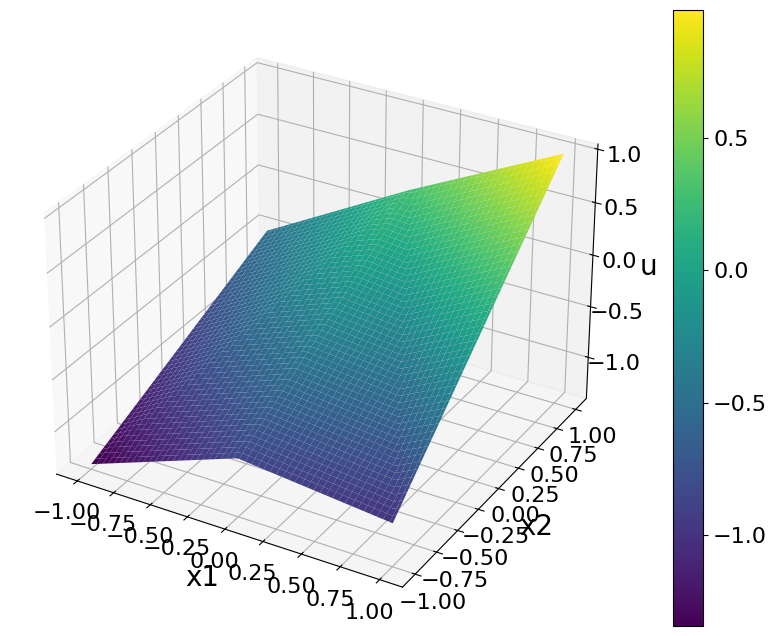

In [ ]:
u_func = sp.lambdify((x1, x2), u, 'numpy')

delta = 1e-3
x1_vals = np.linspace(-1 + delta, 1 - delta, 100)
x2_vals = np.linspace(-1 + delta, 1 - delta, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = u_func(X1, X2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(X1, X2, Z, cmap='coolwarm')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis')
# surf = ax.plot_surface(X1, X2, Z, cmap='hot')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('u')
# ax.set_title('Plot of u(x1, x2)')
fig.colorbar(surf)
plt.show()

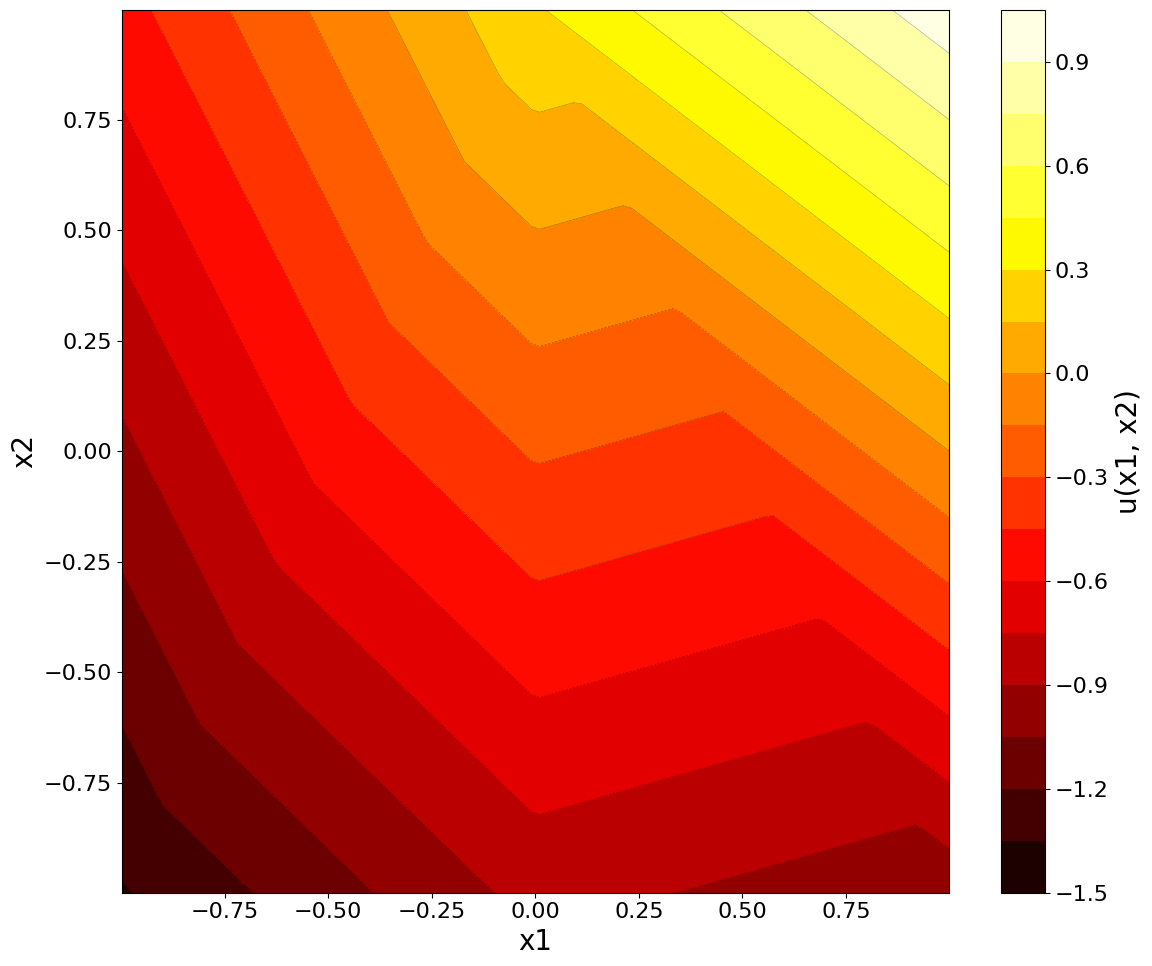

In [131]:
u_func = sp.lambdify((x1, x2), u, 'numpy')

delta = 1e-3
x1_vals = np.linspace(-1 + delta, 1 - delta, 100)
x2_vals = np.linspace(-1 + delta, 1 - delta, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = u_func(X1, X2)

plt.figure(figsize=(12, 10))
contour = plt.contourf(X1, X2, Z, levels=20, cmap='hot')
plt.colorbar(contour, label='u(x1, x2)')
plt.contour(X1, X2, Z, levels=20, colors='k', linewidths=0.5, alpha=0.3)
plt.xlabel('x1')
plt.ylabel('x2')
# plt.title('Contour Plot of u(x1, x2)')
plt.tight_layout()
plt.show()

0.6549170118634613


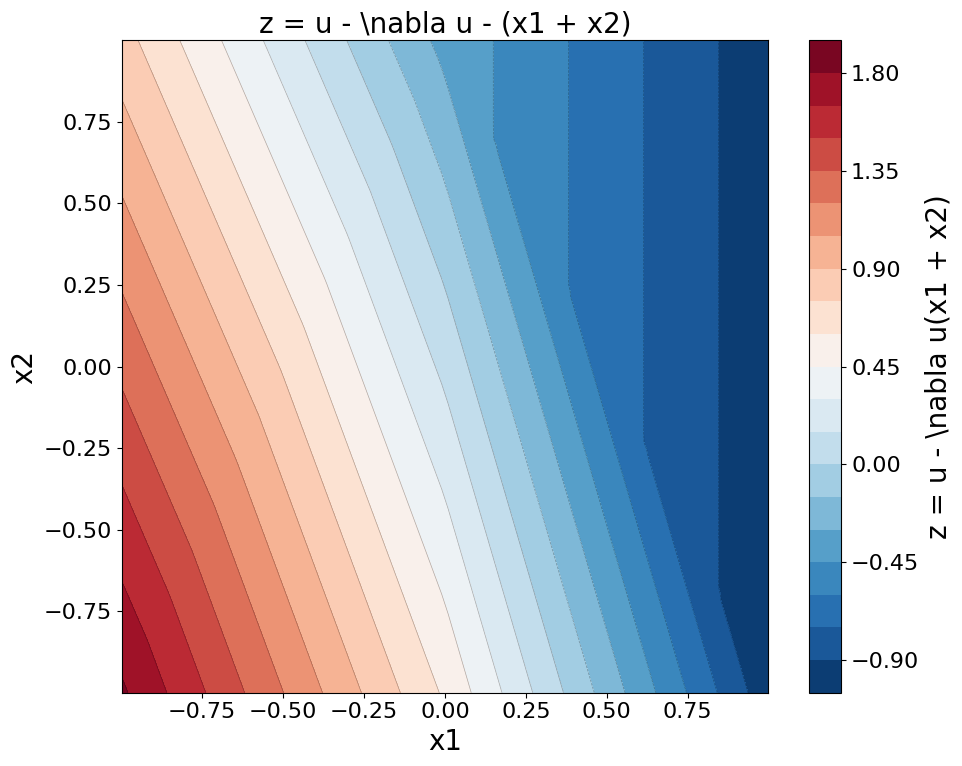

In [ ]:
r1_expr = u - diff(u, x1, 2) - diff(u, x2, 2) - x1 - x2
r1_func = sp.lambdify((x1, x2), r1_expr, 'numpy')

delta = 1e-3
x1_vals = np.linspace(-1 + delta, 1 - delta, 100)
x2_vals = np.linspace(-1 + delta, 1 - delta, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

Z = r1_func(X1, X2)
print(np.mean(np.abs(Z)))

plt.figure(figsize=(10, 8))
contour = plt.contourf(X1, X2, Z, levels=20, cmap='RdBu_r')
plt.colorbar(contour, label=r'z = u - \nabla u(x1 + x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(r'z = u - \nabla u - (x1 + x2)')
plt.contour(X1, X2, Z, levels=20, colors='k', linewidths=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

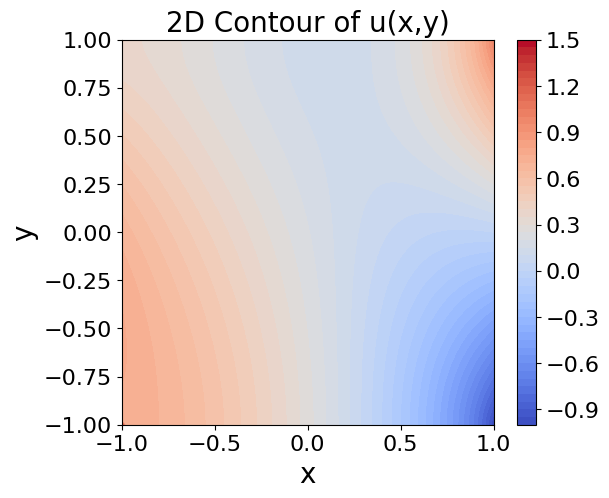

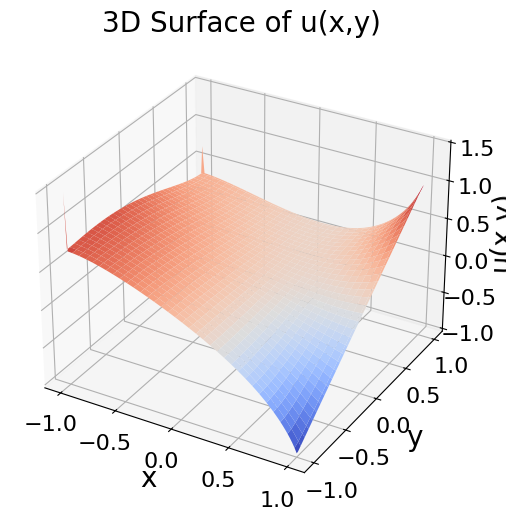

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

# Define grid parameters
Nx, Ny = 101, 101  # Number of grid points
x = np.linspace(-1, 1, Nx)
y = np.linspace(-1, 1, Ny)
dx = x[1] - x[0]
dy = y[1] - y[0]

# Create the system matrix and RHS vector
A = lil_matrix((Nx * Ny, Nx * Ny))
b = np.zeros(Nx * Ny)

# Map 2D indices to 1D
index = lambda i, j: i * Ny + j

# Loop over interior points
for i in range(1, Nx - 1):
    for j in range(1, Ny - 1):
        k = index(i, j)
        A[k, k] = -4 / dx**2 - 1  # Central coefficient
        A[k, index(i-1, j)] = 1 / dx**2  # Left neighbor
        A[k, index(i+1, j)] = 1 / dx**2  # Right neighbor
        A[k, index(i, j-1)] = 1 / dy**2  # Bottom neighbor
        A[k, index(i, j+1)] = 1 / dy**2  # Top neighbor

        # RHS term (forcing function)
        b[k] = x[i] + y[j]

# Apply Dirichlet BC: u(1, y) = y
for j in range(Ny):
    i = Nx - 1  # Right boundary (x=1)
    k = index(i, j)
    A[k, k] = 1
    b[k] = y[j]

# Apply Neumann BC (∂u/∂n = x_2^2 - 1 on left, top, and bottom boundaries)
for j in range(Ny):
    i = 0  # Left boundary (x=-1)
    k = index(i, j)
    A[k, k] = -3 / dx  # Neumann adjustment
    A[k, index(i+1, j)] = 4 / dx
    A[k, index(i+2, j)] = -1 / dx
    b[k] = y[j]**2 - 1

for i in range(Nx):
    j = 0  # Bottom boundary (y=-1)
    k = index(i, j)
    A[k, k] = -3 / dy
    A[k, index(i, j+1)] = 4 / dy
    A[k, index(i, j+2)] = -1 / dy
    b[k] = y[j]**2 - 1

    j = Ny - 1  # Top boundary (y=1)
    k = index(i, j)
    A[k, k] = -3 / dy
    A[k, index(i, j-1)] = 4 / dy
    A[k, index(i, j-2)] = -1 / dy
    b[k] = y[j]**2 - 1

# Solve the linear system
A = A.tocsr()
u = spsolve(A, b).reshape((Nx, Ny))

# Plot results
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize=(6,5))
contour = ax.contourf(X, Y, u.T, levels=50, cmap='coolwarm')
plt.colorbar(contour)
plt.title("2D Contour of u(x,y)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 3D Surface plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u.T, cmap='coolwarm')
ax.set_title("3D Surface of u(x,y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u(x,y)")
plt.show()